In [1]:
import requests

Download data from google

In [2]:
url = 'https://www.gstatic.com/covid19/mobility/Region_Mobility_Report_CSVs.zip'
r = requests.get(url, allow_redirects=True)

open('Region_Mobility_Report_CSVs.zip', 'wb').write(r.content)

23738530

Unzip files

In [6]:
import zipfile
import os
if not os.path.exists("CSVs"):
    os.mkdir("CSVs")
with zipfile.ZipFile('Region_Mobility_Report_CSVs.zip', 'r') as zip_ref:
    zip_ref.extractall("CSVs")

In [7]:
import pandas as pd

In [8]:
data = pd.read_csv("CSVs/2020_DE_Region_Mobility_Report.csv")

In [34]:
import math
germany=data[data["sub_region_1"].isnull()]

In [38]:
germany.set_index("date")

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
date,,,,,,,,,,,,,
2020-02-15,DE,Germany,NaN,NaN,NaN,NaN,NaN,6,1.0,45.0,10.0,0,-1
2020-02-16,DE,Germany,NaN,NaN,NaN,NaN,NaN,7,10.0,9.0,6.0,-1,0
2020-02-17,DE,Germany,NaN,NaN,NaN,NaN,NaN,2,2.0,7.0,1.0,-2,0
2020-02-18,DE,Germany,NaN,NaN,NaN,NaN,NaN,2,2.0,10.0,1.0,-1,1
2020-02-19,DE,Germany,NaN,NaN,NaN,NaN,NaN,3,0.0,6.0,-1.0,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-26,DE,Germany,NaN,NaN,NaN,NaN,NaN,-15,-1.0,12.0,-23.0,-17,6
2020-10-27,DE,Germany,NaN,NaN,NaN,NaN,NaN,-14,0.0,35.0,-20.0,-16,7
2020-10-28,DE,Germany,NaN,NaN,NaN,NaN,NaN,-11,0.0,33.0,-21.0,-15,6


In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
import matplotlib.style as style

style.use('seaborn-poster')
style.use('ggplot')

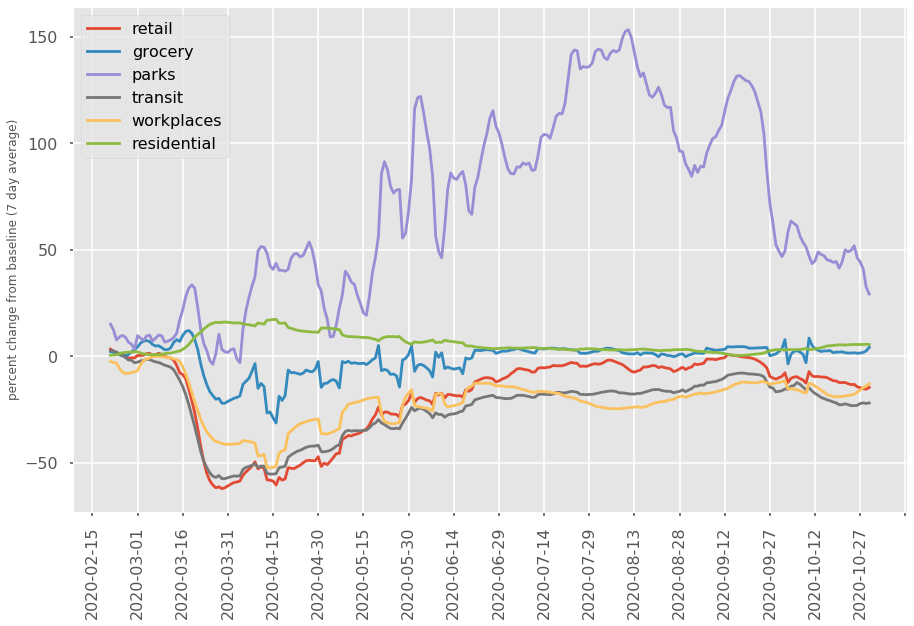

In [56]:
interesting_colums=[]
for label, _ in germany.items():
    if "_baseline" in label:
        interesting_colums.append(label)

smoothing=7
for columnname in interesting_colums:
    plt.plot(germany["date"],germany[columnname].rolling(smoothing).mean(),label=columnname.split("_")[0])

plt.xticks(rotation='vertical')
plt.ylabel("percent change from baseline ({} day average)".format(smoothing))
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(15))
plt.legend()
#plt.savefig("mobility.svg")

plt.show()

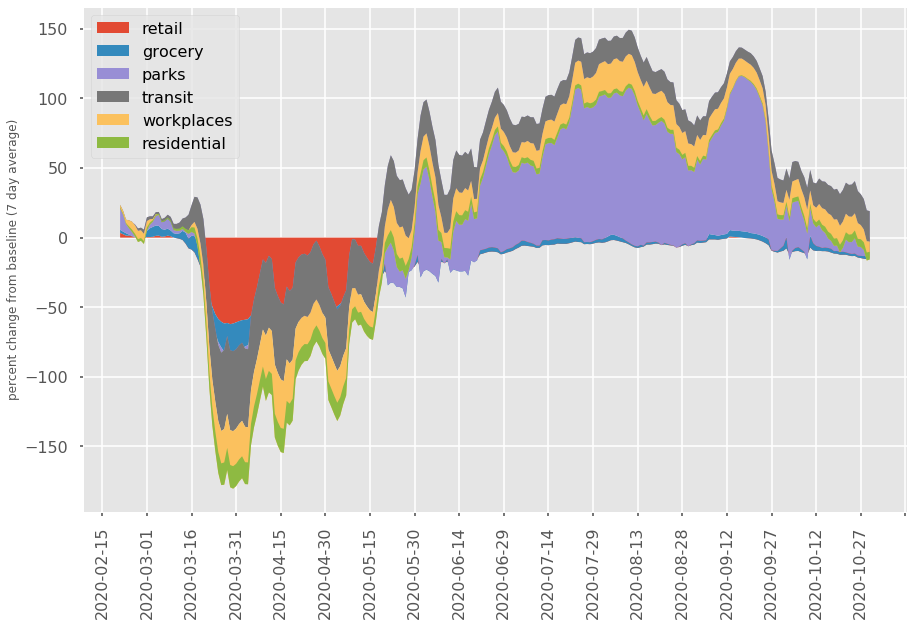

In [79]:
import numpy as np
stack=[]
names=[]
for columnname in interesting_colums:
    stack.append(germany[columnname].rolling(smoothing).mean())
    names.append(columnname.split("_")[0])

stack=np.array(stack)
plt.stackplot(germany["date"],stack,labels=names)
plt.xticks(rotation='vertical')
plt.ylabel("percent change from baseline ({} day average)".format(smoothing))
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(15))
plt.legend(loc='upper left')
plt.show()